In [5]:
import os
import numpy as np
import pandas as pd
import random 
import time
import matplotlib.pyplot as plt
import cv2
from glob import glob
from PIL import Image
%matplotlib inline

In [6]:
image = np.zeros((256,256))

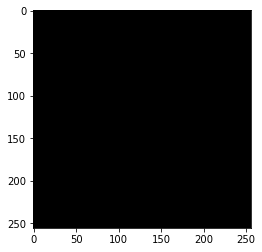

In [7]:
plt.imshow(image, cmap="gray", vmin=0, vmax=1)

In [8]:
# path1 = [(128, i) for i in range(256)]

In [9]:
# path2 = []
# i = 0
# x = 119
# for y in range(0,256,2):
#     if i==0:
#         path2.append((x,y))
#         i += 1
#     else:
#         path2.append((x, y))
#         x -= 1
#         i -= 1

In [10]:
# path2 += [(-1,-1) for _ in range(128)]

In [11]:
# path3 = []
# x = 137
# y = 0
# i = 0
# while len(path3)<=256:
#     if i==0:
#         path3.append((x,y))
#         path3.append((x,y))
#         y += 1
#         i += 1
#     else:
#         path3.append((x,y))
#         y += 1
#         i -= 1

In [88]:
# path3[-2]

(137, 170)

In [89]:
# path3 += [(137, 171)]

In [90]:
# len(path3)

258

In [73]:
# for p1,p2,p3 in zip(path1, path2, path3):
#     print(p1,p2,p3)

(128, 0) (119, 0) (137, 0)
(128, 1) (119, 2) (137, 0)
(128, 2) (118, 4) (137, 1)
(128, 3) (118, 6) (137, 1)
(128, 4) (117, 8) (137, 2)
(128, 5) (117, 10) (137, 2)
(128, 6) (116, 12) (137, 3)
(128, 7) (116, 14) (137, 3)
(128, 8) (115, 16) (137, 4)
(128, 9) (115, 18) (137, 4)
(128, 10) (114, 20) (137, 5)
(128, 11) (114, 22) (137, 5)
(128, 12) (113, 24) (137, 6)
(128, 13) (113, 26) (137, 6)
(128, 14) (112, 28) (137, 7)
(128, 15) (112, 30) (137, 7)
(128, 16) (111, 32) (137, 8)
(128, 17) (111, 34) (137, 8)
(128, 18) (110, 36) (137, 9)
(128, 19) (110, 38) (137, 9)
(128, 20) (109, 40) (137, 10)
(128, 21) (109, 42) (137, 10)
(128, 22) (108, 44) (137, 11)
(128, 23) (108, 46) (137, 11)
(128, 24) (107, 48) (137, 12)
(128, 25) (107, 50) (137, 12)
(128, 26) (106, 52) (137, 13)
(128, 27) (106, 54) (137, 13)
(128, 28) (105, 56) (137, 14)
(128, 29) (105, 58) (137, 14)
(128, 30) (104, 60) (137, 15)
(128, 31) (104, 62) (137, 15)
(128, 32) (103, 64) (137, 16)
(128, 33) (103, 66) (137, 16)
(128, 34) (102,

In [12]:
# class vehicle:
#     def __init__(self, width, length):
#         self.w = width
#         self.l = length
    
#     def getRange(self, yc, xc):
#         xmin = min(xc, abs(xc-int(self.l/2)))
#         xmax = min(255, abs(xc+int(self.l/2)))
#         ymin = min(yc, abs(yc-int(self.w/2)))
#         ymax = min(255, abs(yc+int(self.w/2)))
#         return ymin, ymax, xmin, xmax
    
#     def createObj(self, image, new_pos):
#         if new_pos[0]==(-1):
#             return image
#         ymin, ymax, xmin, xmax = self.getRange(new_pos[0], new_pos[1])
#         for i in range(ymin, ymax+1):
#             for j in range(xmin, xmax+1):
#                 image[i][j] = 1
#         return image

In [13]:
# image_seq = []
# for p1,p2,p3 in zip(path1, path2, path3):
#     image = np.zeros((256, 256))
#     carObj1 = vehicle(6,10)
#     carObj2 = vehicle(6,10)
#     busObj1 = vehicle(8,20)
#     new_image = carObj1.createObj(image, p1)
#     new_image = carObj2.createObj(new_image, p2)
#     new_image = busObj1.createObj(new_image, p3)
#     image_seq.append(new_image)

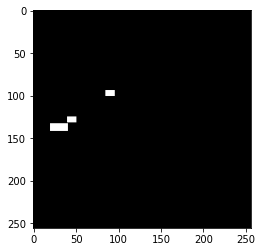

In [93]:
# plt.imshow(image_seq[45], cmap="gray", vmin=0, vmax=1)

In [14]:
# for i,img in enumerate(image_seq):
#     plt.imsave(f"video_images\\{i}.png", img, cmap="gray", vmin=0, vmax=1)

In [15]:
# a = Image.open("video_images\\0.png")

In [16]:
# fnames = sorted([fname for fname in os.listdir('video_images') if fname.endswith('.png')], key=lambda f: int(f.rsplit(os.path.extsep, 1)[0].rsplit(None,1)[-1]))

In [17]:
# fnames = ["video_images\\"+i for i in fnames]

In [18]:
# image_list = []
# for img_name in fnames:
#     img = Image.open(img_name)
#     image_list.append(img)

In [19]:
# image_list[0].save("out.gif", save_all=True, append_images=image_list[1:], duration=50, loop=0)

In [20]:
LABEL = 153
RADIOMAPS_FOLDER = "gain\\DPM\\"
BUILDINGS_FOLDER = "png\\buildings_complete\\"
BASE_STATION_FOLDER = "png\\antennas\\"

In [21]:
IMAGE_ROWS = 256
IMAGE_COLUMNS = 256
FRAME_MULTIPLIER = 6
NUM_FRAMES = IMAGE_COLUMNS*FRAME_MULTIPLIER
MAIN_OBJ_SPEED = "v"
DURATION = 7 # Duration for each frame in milliseconds, Total Time = (DURATION/1000)*NUM_FRAMES seconds

In [22]:
def getOpenAreaPoints(image):
    nrow, ncol = image.shape
    list_of_points = []
    for i in range(nrow):
        for j in range(ncol):
            if image[i][j]==0:
                list_of_points.append((i,j))
    return list_of_points

In [23]:
def euclidean_dist(point1, point2):
    p1 = np.array(point1)
    p2 = np.array(point2)
    dist = np.linalg.norm(p1 - p2)
    return dist

In [24]:
# # Bresenham Line Generation Algorithm
# def getLinePoints(x1,y1,x2, y2):
#     list_of_points = []
#     m_new = 2 * (y2 - y1)
#     slope_error_new = m_new - (x2 - x1)
#     y=y1
#     for x in range(x1,x2+1):
#         list_of_points.append((x,y))
#         slope_error_new =slope_error_new + m_new
#         if (slope_error_new >= 0):
#             y=y+1
#             slope_error_new =slope_error_new - 2 * (x2 - x1)
#     return list_of_points

In [25]:
# modified DDA
def DDA(x0, y0, x1, y1):
 
    dx = abs(x0 - x1)
    dy = abs(y0 - y1)
 
    steps = max(dx, dy)
 
    xinc  = dx/steps
    yinc = dy/steps
 
    x_coorinates = []
    y_coorinates = []
    
    if x0>=x1:
        x = float(x0)
        for i in range(steps):
            x_coorinates.append(x)
            x -= xinc
    else:
        x = float(x0)
        for i in range(steps):
            x_coorinates.append(x)
            x += xinc
    
    if y0>=y1:
        y = float(y0)
        for i in range(steps):
            y_coorinates.append(y)
            y -= yinc
    else:
        y = float(y0)
        for i in range(steps):
            y_coorinates.append(y)
            y += yinc
 
    x_coorinates = list(map(int, x_coorinates))
    y_coorinates = list(map(int, y_coorinates))
 
    return list(zip(x_coorinates, y_coorinates))

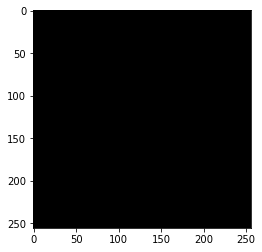

In [26]:
temp_img = np.zeros((256,256))
plt.imshow(temp_img, cmap="gray", vmin=0, vmax=1)

In [27]:
# (36, 140)(97, 61)
line = DDA(61, 97, 36, 140)
for p in line:
    temp_img[p[1]][p[0]]=1

In [29]:
line

[(61, 97),
 (60, 98),
 (59, 99),
 (59, 100),
 (58, 101),
 (58, 102),
 (57, 103),
 (56, 104),
 (56, 105),
 (55, 106),
 (55, 107),
 (54, 108),
 (54, 109),
 (53, 110),
 (52, 111),
 (52, 112),
 (51, 113),
 (51, 114),
 (50, 115),
 (49, 116),
 (49, 117),
 (48, 118),
 (48, 119),
 (47, 120),
 (47, 121),
 (46, 122),
 (45, 123),
 (45, 124),
 (44, 125),
 (44, 126),
 (43, 127),
 (42, 128),
 (42, 129),
 (41, 130),
 (41, 131),
 (40, 132),
 (40, 133),
 (39, 134),
 (38, 135),
 (38, 136),
 (37, 137),
 (37, 138),
 (36, 139)]

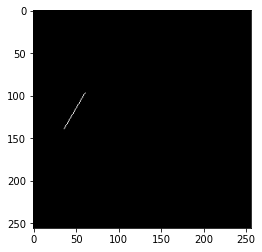

In [30]:
plt.imshow(temp_img, cmap="gray", vmin=0, vmax=1)

In [31]:
# Mid Point Circle Generation Algorithm
def getCirclePoints(x_centre, y_centre, r):
    list_of_points =[]
    x = r
    y = 0
    list_of_points.append((x + x_centre, y + y_centre))
    if (r > 0) :
        list_of_points.append((x + x_centre, -y + y_centre))
        list_of_points.append((y + x_centre, x + y_centre))
        list_of_points.append((-y + x_centre, x + y_centre))
    P = 1 - r
    while x > y:
        y += 1
        if P <= 0:
            P = P + 2 * y + 1
        else:        
            x -= 1
            P = P + 2 * y - 2 * x + 1
        if (x < y):
            break
        list_of_points.append((x + x_centre, y + y_centre))
        list_of_points.append((-x + x_centre, y + y_centre))
        list_of_points.append((x + x_centre, -y + y_centre))
        list_of_points.append((-x + x_centre, -y + y_centre))
        if x != y:
            list_of_points.append((y + x_centre, x + y_centre))
            list_of_points.append((-y + x_centre, x + y_centre)) 
            list_of_points.append((y + x_centre, -x + y_centre)) 
            list_of_points.append((-y + x_centre, -x + y_centre)) 
    return list_of_points

In [32]:
def getImageName(string, target_folder):
    string = string.replace(target_folder, "")
    string = string.replace(".png", "")
    return string

In [33]:
def getBaseStationCoords(base_station_img):
    nrow, ncol = base_station_img.shape
    list_of_points = []
    for i in range(nrow):
        for j in range(ncol):
            if base_station_img[i][j]==1:
                list_of_points.append((i,j))
    return list_of_points

In [34]:
def addPathsToImage(image, list_of_paths):
    print(len(list_of_paths))
    new_image = image.copy()
    for path in list_of_paths:
        for points in path:
            new_image[points[1]][points[0]] = 1
    return new_image

In [35]:
def addBaseStationToImage(image, bs_coords):
    new_image = image.copy()
    highlighter_points = [bs_coords]
    highlighter_points += getCirclePoints(bs_coords[1], bs_coords[0], 1)
#     highlighter_points += getCirclePoints(bs_coords[1], bs_coords[0], 3)
    highlighter_points += getCirclePoints(bs_coords[1], bs_coords[0], 5)
    for point in highlighter_points:
        new_image[point[1]][point[0]] = 1
    return new_image

In [36]:
def create_radiomap_dict(radiomap_folder, base_station_folder):
    radiomap_dict = {}
    list_of_radiomaps_path = glob(radiomap_folder+str(LABEL)+"_*.png")
    list_of_base_stations_path = glob(base_station_folder+str(LABEL)+"_*.png")
    for raidomap_path, base_station_path in zip(list_of_radiomaps_path, list_of_base_stations_path):
        name1 = getImageName(raidomap_path, RADIOMAPS_FOLDER)
        name2 = getImageName(base_station_path, BASE_STATION_FOLDER)
        assert name1==name2
        name = name1
        radiomap_dict[name] = {}
        radiomap_img = plt.imread(raidomap_path)
        base_station_img = plt.imread(base_station_path)
        base_station_coords = getBaseStationCoords(base_station_img)[0]
        radiomap_dict[name]["name"] = name
        radiomap_dict[name]["base_station_coords"] = base_station_coords
        radiomap_dict[name]["radiomap"] = radiomap_img
    return radiomap_dict

In [37]:
radiomap_dict = create_radiomap_dict(RADIOMAPS_FOLDER, BASE_STATION_FOLDER)

In [38]:
# radiomap_dict.keys()

dict_keys(['153_0', '153_1', '153_10', '153_11', '153_12', '153_13', '153_14', '153_15', '153_16', '153_17', '153_18', '153_19', '153_2', '153_20', '153_21', '153_22', '153_23', '153_24', '153_25', '153_26', '153_27', '153_28', '153_29', '153_3', '153_30', '153_31', '153_32', '153_33', '153_34', '153_35', '153_36', '153_37', '153_38', '153_39', '153_4', '153_40', '153_41', '153_42', '153_43', '153_44', '153_45', '153_46', '153_47', '153_48', '153_49', '153_5', '153_50', '153_51', '153_52', '153_53', '153_54', '153_55', '153_56', '153_57', '153_58', '153_59', '153_6', '153_60', '153_61', '153_62', '153_63', '153_64', '153_65', '153_66', '153_67', '153_68', '153_69', '153_7', '153_70', '153_71', '153_72', '153_73', '153_74', '153_75', '153_76', '153_77', '153_78', '153_79', '153_8', '153_9'])

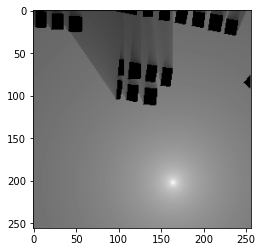

In [39]:
plt.imshow(radiomap_dict["153_11"]["radiomap"], cmap="gray")

In [42]:
selected_base_stations = ["153_19", "153_11"]

In [43]:
# radiomap_dict["153_19"]["base_station_coords"]

(97, 61)

In [44]:
building_image = plt.imread(BUILDINGS_FOLDER+str(LABEL)+".png")

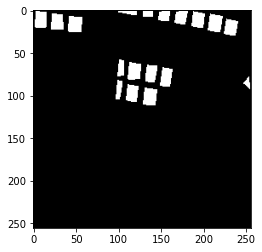

In [45]:
plt.imshow(building_image, cmap="gray")

In [46]:
list_of_defined_paths = [DDA(0,130,255,130), DDA(0,140,255,140), DDA(0,150,255,150), DDA(75,0,75,255)]

In [62]:
building_image_with_paths = addPathsToImage(building_image, list_of_defined_paths)

4


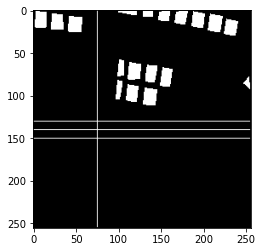

In [63]:
plt.imshow(building_image_with_paths, cmap="gray")

In [162]:
building_img_with_paths_and_bs = addBaseStationToImage(building_image_with_paths, radiomap_dict['153_11']['base_station_coords'])
building_img_with_paths_and_bs = addBaseStationToImage(building_img_with_paths_and_bs, radiomap_dict['153_19']['base_station_coords'])

In [66]:
temp = cv2.circle(building_image_with_paths, (61, 97), 5, (1, 1, 1), 1)
temp = cv2.circle(temp, (61, 97), 3, (1, 1, 1), 1)

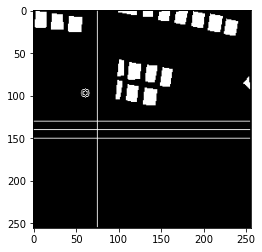

In [67]:
plt.imshow(temp, cmap="gray")

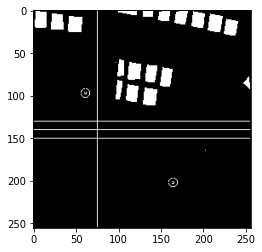

In [163]:
plt.imshow(building_img_with_paths_and_bs, cmap="gray")

In [196]:
class vehicle:
    def __init__(self, name, dims, speed, direction, sf):
        self.name = name
        self.l = dims[0]
        self.w = dims[1]
        self.speed = speed
        self.dir = direction
        self.sf = sf # starting frame
        self.fpr = int(FRAME_MULTIPLIER/int(speed[0])) if speed[0]!="v" else int(FRAME_MULTIPLIER*int(speed[-1])) # frame points repeat 
        self.counter = self.fpr 
        self.spi = 0 if self.sf!=0 else None # starting point index
        self.idx = self.spi # index
        self.path = None # select from list_of_defined_paths
        self.lopp = [] # list of path points
    
    def updateSPIandPATH(self, spi, path):
        self.path = path
        if self.sf!=0:
            if self.dir=="+":
                self.spi=0
            else:
                self.spi=len(self.path)-1
        else:
            self.spi = spi
        self.idx = self.spi
    
    def getPathPoints(self):
        ttp = NUM_FRAMES
        if self.sf!=0:
            while self.sf>=2:
                self.lopp.append((-1,-1))
                self.sf -= 1
                ttp -= 1
        if self.dir=="+":
            while ttp>0:
                for _ in range(self.fpr):
                    self.lopp.append(self.path[self.idx])
                self.idx += 1
                ttp -= self.fpr
                if self.idx>=len(self.path):
                    break
        else:
            while ttp>0:
                for _ in range(self.fpr):
                    self.lopp.append(self.path[self.idx])
                self.idx -= 1
                ttp -= self.fpr
                if self.idx<0:
                    break
        if ttp>0:
            for _ in range(ttp):
                self.lopp.append((-1,-1))
        assert len(self.lopp)==NUM_FRAMES
        return self.lopp
    
    def getCurrentCoords(self, frame_idx):
        return self.lopp[frame_idx][::-1]
    
    def getRange(self, xc, yc):
        xmin = min(xc, abs(xc-int(self.l/2)))
        xmax = min(255, abs(xc+int(self.l/2)))
        ymin = min(yc, abs(yc-int(self.w/2)))
        ymax = min(255, abs(yc+int(self.w/2)))
        return ymin, ymax, xmin, xmax
    
    def drawObj(self, frame_idx, image):
        new_pos = self.lopp[frame_idx]
        if new_pos[0]==(-1):
            return image
        ymin, ymax, xmin, xmax = self.getRange(new_pos[0], new_pos[1])
        for i in range(ymin, ymax+1):
            for j in range(xmin, xmax+1):
                image[i][j] = 1
        return image

In [197]:
mainCar = vehicle("main", (10,6), "1v", "+", 0)
mainCar.updateSPIandPATH(0, list_of_defined_paths[1])
mainCar.getPathPoints()

[(0, 140),
 (0, 140),
 (0, 140),
 (0, 140),
 (0, 140),
 (0, 140),
 (1, 140),
 (1, 140),
 (1, 140),
 (1, 140),
 (1, 140),
 (1, 140),
 (2, 140),
 (2, 140),
 (2, 140),
 (2, 140),
 (2, 140),
 (2, 140),
 (3, 140),
 (3, 140),
 (3, 140),
 (3, 140),
 (3, 140),
 (3, 140),
 (4, 140),
 (4, 140),
 (4, 140),
 (4, 140),
 (4, 140),
 (4, 140),
 (5, 140),
 (5, 140),
 (5, 140),
 (5, 140),
 (5, 140),
 (5, 140),
 (6, 140),
 (6, 140),
 (6, 140),
 (6, 140),
 (6, 140),
 (6, 140),
 (7, 140),
 (7, 140),
 (7, 140),
 (7, 140),
 (7, 140),
 (7, 140),
 (8, 140),
 (8, 140),
 (8, 140),
 (8, 140),
 (8, 140),
 (8, 140),
 (9, 140),
 (9, 140),
 (9, 140),
 (9, 140),
 (9, 140),
 (9, 140),
 (10, 140),
 (10, 140),
 (10, 140),
 (10, 140),
 (10, 140),
 (10, 140),
 (11, 140),
 (11, 140),
 (11, 140),
 (11, 140),
 (11, 140),
 (11, 140),
 (12, 140),
 (12, 140),
 (12, 140),
 (12, 140),
 (12, 140),
 (12, 140),
 (13, 140),
 (13, 140),
 (13, 140),
 (13, 140),
 (13, 140),
 (13, 140),
 (14, 140),
 (14, 140),
 (14, 140),
 (14, 140),
 (14

In [266]:
mainCar.lopp[220]

(36, 140)

In [198]:
car2 = vehicle("obstacle1", (10,6), "2v", "-", 512)
car2.updateSPIandPATH(0, list_of_defined_paths[2])
car2.getPathPoints()

[(-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),

In [214]:
bus = vehicle("obstacle2", (20,8), "v/2", "+", 0)
bus.updateSPIandPATH(80, list_of_defined_paths[0])
bus.getPathPoints()

[(80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (80, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (81, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (82, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (83, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (84, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (85, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86, 130),
 (86

In [215]:
list_of_obj = [mainCar, car2, bus]

In [318]:
def createImageSeq(building_image, building_image_detailed, radiomap_dict, list_of_obj, selected_base_stations):
   
    global LABEL
    global RADIOMAPS_FOLDER
    global BUILDINGS_FOLDER
    global BASE_STATION_FOLDER
    global IMAGE_ROWS
    global IMAGE_COLUMNS
    global FRAME_MULTIPLIER
    global NUM_FRAMES
    global DURATION
    
    start = time.perf_counter()
    
    image_seq = []
    image_seq_detailed = []
    
    los_bs1 = []
    los_bs2 = []
    dist_bs1 = []
    dist_bs2 = []
    main_obj_coords = []
    
    main_obj = list_of_obj[0]
    list_of_obstacles = list_of_obj[1:]
    
    bs1_coords = radiomap_dict[selected_base_stations[0]]["base_station_coords"]
    bs2_coords = radiomap_dict[selected_base_stations[1]]["base_station_coords"]
    
    for i in range(NUM_FRAMES):
        new_image = building_image.copy()
        new_image2 = building_image_detailed.copy()
        for obstacle in list_of_obstacles:
            new_image = obstacle.drawObj(i, new_image)
            new_image2 = obstacle.drawObj(i, new_image2)
        
        open_area_points = set(getOpenAreaPoints(new_image))
        main_current_coords = main_obj.getCurrentCoords(i)
        main_obj_coords.append(main_current_coords)
        
        dist_bs1.append(euclidean_dist(main_current_coords, bs1_coords))
        dist_bs2.append(euclidean_dist(main_current_coords, bs2_coords))
        
        los1_points = set(DDA(main_current_coords[0], main_current_coords[1], bs1_coords[1], bs1_coords[0]))
        los2_points = set(DDA(main_current_coords[0], main_current_coords[1], bs2_coords[1], bs2_coords[0]))
        
        if los1_points.issubset(open_area_points):
            los_bs1.append(1)
        else:
            los_bs1.append(0)
            
        if los2_points.issubset(open_area_points):
            los_bs2.append(1)
        else:
            los_bs2.append(0)
            
        new_image = main_obj.drawObj(i, new_image)
        new_image2 = main_obj.drawObj(i, new_image2)
        
        image_seq.append(new_image)
        image_seq_detailed.append(new_image2)
        
        print(f"Processing of Frame : {i+1} completed...")
    
    frames = [i+1 for i in range(NUM_FRAMES)]
    time_stamps = [(i+1)*(DURATION/1000) for i in range(NUM_FRAMES)]
    
    df = pd.DataFrame(columns=["Frame", "Time_Stamp", "Main_Obj_Coords", "Distance_from_BS1", "Distance_from_BS2", "LOS_BS1", "LOS_BS2"])
    df["Frame"] = frames
    df["Time_Stamp"] = time_stamps
    df["Main_Obj_Coords"] = main_obj_coords
    df["Distance_from_BS1"] = dist_bs1
    df["Distance_from_BS2"] = dist_bs2
    df["LOS_BS1"] = los_bs1
    df["LOS_BS2"] = los_bs2
    
    end = time.perf_counter()
    print(f"Processing of complete sequence is done in {end-start} seconds...")
    
    return df, image_seq, image_seq_detailed

In [319]:
df, image_seq, image_seq_detailed = createImageSeq(building_image, building_img_with_paths_and_bs, radiomap_dict, list_of_obj, selected_base_stations)

Processing of Frame : 1 completed...
Processing of Frame : 2 completed...
Processing of Frame : 3 completed...
Processing of Frame : 4 completed...
Processing of Frame : 5 completed...
Processing of Frame : 6 completed...
Processing of Frame : 7 completed...
Processing of Frame : 8 completed...
Processing of Frame : 9 completed...
Processing of Frame : 10 completed...
Processing of Frame : 11 completed...
Processing of Frame : 12 completed...
Processing of Frame : 13 completed...
Processing of Frame : 14 completed...
Processing of Frame : 15 completed...
Processing of Frame : 16 completed...
Processing of Frame : 17 completed...
Processing of Frame : 18 completed...
Processing of Frame : 19 completed...
Processing of Frame : 20 completed...
Processing of Frame : 21 completed...
Processing of Frame : 22 completed...
Processing of Frame : 23 completed...
Processing of Frame : 24 completed...
Processing of Frame : 25 completed...
Processing of Frame : 26 completed...
Processing of Frame :

Processing of Frame : 215 completed...
Processing of Frame : 216 completed...
Processing of Frame : 217 completed...
Processing of Frame : 218 completed...
Processing of Frame : 219 completed...
Processing of Frame : 220 completed...
Processing of Frame : 221 completed...
Processing of Frame : 222 completed...
Processing of Frame : 223 completed...
Processing of Frame : 224 completed...
Processing of Frame : 225 completed...
Processing of Frame : 226 completed...
Processing of Frame : 227 completed...
Processing of Frame : 228 completed...
Processing of Frame : 229 completed...
Processing of Frame : 230 completed...
Processing of Frame : 231 completed...
Processing of Frame : 232 completed...
Processing of Frame : 233 completed...
Processing of Frame : 234 completed...
Processing of Frame : 235 completed...
Processing of Frame : 236 completed...
Processing of Frame : 237 completed...
Processing of Frame : 238 completed...
Processing of Frame : 239 completed...
Processing of Frame : 240

Processing of Frame : 427 completed...
Processing of Frame : 428 completed...
Processing of Frame : 429 completed...
Processing of Frame : 430 completed...
Processing of Frame : 431 completed...
Processing of Frame : 432 completed...
Processing of Frame : 433 completed...
Processing of Frame : 434 completed...
Processing of Frame : 435 completed...
Processing of Frame : 436 completed...
Processing of Frame : 437 completed...
Processing of Frame : 438 completed...
Processing of Frame : 439 completed...
Processing of Frame : 440 completed...
Processing of Frame : 441 completed...
Processing of Frame : 442 completed...
Processing of Frame : 443 completed...
Processing of Frame : 444 completed...
Processing of Frame : 445 completed...
Processing of Frame : 446 completed...
Processing of Frame : 447 completed...
Processing of Frame : 448 completed...
Processing of Frame : 449 completed...
Processing of Frame : 450 completed...
Processing of Frame : 451 completed...
Processing of Frame : 452

Processing of Frame : 638 completed...
Processing of Frame : 639 completed...
Processing of Frame : 640 completed...
Processing of Frame : 641 completed...
Processing of Frame : 642 completed...
Processing of Frame : 643 completed...
Processing of Frame : 644 completed...
Processing of Frame : 645 completed...
Processing of Frame : 646 completed...
Processing of Frame : 647 completed...
Processing of Frame : 648 completed...
Processing of Frame : 649 completed...
Processing of Frame : 650 completed...
Processing of Frame : 651 completed...
Processing of Frame : 652 completed...
Processing of Frame : 653 completed...
Processing of Frame : 654 completed...
Processing of Frame : 655 completed...
Processing of Frame : 656 completed...
Processing of Frame : 657 completed...
Processing of Frame : 658 completed...
Processing of Frame : 659 completed...
Processing of Frame : 660 completed...
Processing of Frame : 661 completed...
Processing of Frame : 662 completed...
Processing of Frame : 663

Processing of Frame : 850 completed...
Processing of Frame : 851 completed...
Processing of Frame : 852 completed...
Processing of Frame : 853 completed...
Processing of Frame : 854 completed...
Processing of Frame : 855 completed...
Processing of Frame : 856 completed...
Processing of Frame : 857 completed...
Processing of Frame : 858 completed...
Processing of Frame : 859 completed...
Processing of Frame : 860 completed...
Processing of Frame : 861 completed...
Processing of Frame : 862 completed...
Processing of Frame : 863 completed...
Processing of Frame : 864 completed...
Processing of Frame : 865 completed...
Processing of Frame : 866 completed...
Processing of Frame : 867 completed...
Processing of Frame : 868 completed...
Processing of Frame : 869 completed...
Processing of Frame : 870 completed...
Processing of Frame : 871 completed...
Processing of Frame : 872 completed...
Processing of Frame : 873 completed...
Processing of Frame : 874 completed...
Processing of Frame : 875

Processing of Frame : 1059 completed...
Processing of Frame : 1060 completed...
Processing of Frame : 1061 completed...
Processing of Frame : 1062 completed...
Processing of Frame : 1063 completed...
Processing of Frame : 1064 completed...
Processing of Frame : 1065 completed...
Processing of Frame : 1066 completed...
Processing of Frame : 1067 completed...
Processing of Frame : 1068 completed...
Processing of Frame : 1069 completed...
Processing of Frame : 1070 completed...
Processing of Frame : 1071 completed...
Processing of Frame : 1072 completed...
Processing of Frame : 1073 completed...
Processing of Frame : 1074 completed...
Processing of Frame : 1075 completed...
Processing of Frame : 1076 completed...
Processing of Frame : 1077 completed...
Processing of Frame : 1078 completed...
Processing of Frame : 1079 completed...
Processing of Frame : 1080 completed...
Processing of Frame : 1081 completed...
Processing of Frame : 1082 completed...
Processing of Frame : 1083 completed...


Processing of Frame : 1264 completed...
Processing of Frame : 1265 completed...
Processing of Frame : 1266 completed...
Processing of Frame : 1267 completed...
Processing of Frame : 1268 completed...
Processing of Frame : 1269 completed...
Processing of Frame : 1270 completed...
Processing of Frame : 1271 completed...
Processing of Frame : 1272 completed...
Processing of Frame : 1273 completed...
Processing of Frame : 1274 completed...
Processing of Frame : 1275 completed...
Processing of Frame : 1276 completed...
Processing of Frame : 1277 completed...
Processing of Frame : 1278 completed...
Processing of Frame : 1279 completed...
Processing of Frame : 1280 completed...
Processing of Frame : 1281 completed...
Processing of Frame : 1282 completed...
Processing of Frame : 1283 completed...
Processing of Frame : 1284 completed...
Processing of Frame : 1285 completed...
Processing of Frame : 1286 completed...
Processing of Frame : 1287 completed...
Processing of Frame : 1288 completed...


Processing of Frame : 1470 completed...
Processing of Frame : 1471 completed...
Processing of Frame : 1472 completed...
Processing of Frame : 1473 completed...
Processing of Frame : 1474 completed...
Processing of Frame : 1475 completed...
Processing of Frame : 1476 completed...
Processing of Frame : 1477 completed...
Processing of Frame : 1478 completed...
Processing of Frame : 1479 completed...
Processing of Frame : 1480 completed...
Processing of Frame : 1481 completed...
Processing of Frame : 1482 completed...
Processing of Frame : 1483 completed...
Processing of Frame : 1484 completed...
Processing of Frame : 1485 completed...
Processing of Frame : 1486 completed...
Processing of Frame : 1487 completed...
Processing of Frame : 1488 completed...
Processing of Frame : 1489 completed...
Processing of Frame : 1490 completed...
Processing of Frame : 1491 completed...
Processing of Frame : 1492 completed...
Processing of Frame : 1493 completed...
Processing of Frame : 1494 completed...


In [320]:
df

,Frame,Time_Stamp,Main_Obj_Coords,Distance_from_BS1,Distance_from_BS2,LOS_BS1,LOS_BS2
0,1,0.007,"(140, 0)",74.632433,175.328264,1,1
1,2,0.014,"(140, 0)",74.632433,175.328264,1,1
2,3,0.021,"(140, 0)",74.632433,175.328264,1,1
3,4,0.028,"(140, 0)",74.632433,175.328264,1,1
4,5,0.035,"(140, 0)",74.632433,175.328264,1,1
...,...,...,...,...,...,...,...
1531,1532,10.724,"(-1, -1)",115.965512,261.598930,0,0
1532,1533,10.731,"(-1, -1)",115.965512,261.598930,0,0
1533,1534,10.738,"(-1, -1)",115.965512,261.598930,0,0
1534,1535,10.745,"(-1, -1)",115.965512,261.598930,0,0


In [321]:
df.to_csv("line_of_sight_data_2.csv")

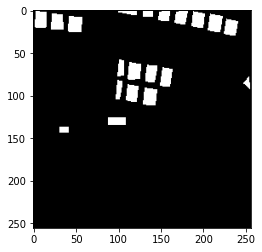

In [250]:
plt.imshow(image_seq[220], cmap="gray")

In [322]:
def createGif(image_seq, savename):
    if savename not in os.listdir():
        os.mkdir(f"{savename}")
    for i,img in enumerate(image_seq):
        plt.imsave(f"{savename}\\{i}.png", img, cmap="gray", vmin=0, vmax=1)
    fnames = sorted([fname for fname in os.listdir(f'{savename}') if fname.endswith('.png')], key=lambda f: int(f.rsplit(os.path.extsep, 1)[0].rsplit(None,1)[-1]))
    fnames = [f"{savename}\\"+i for i in fnames]
    image_list = []
    for img_name in fnames:
        img = Image.open(img_name)
        image_list.append(img)
    image_list[0].save(f"output_{savename}.gif", save_all=True, append_images=image_list[1:], duration=DURATION, loop=0)

In [323]:
createGif(image_seq_detailed, "video2")